## 601 FINAL PROJECT
BY: RASHMINI AKKAPALLY

AKSHARA KOCHARLA


ABUSUFIYAN MOHAMMAD

Location of the datasets: https://sam.gov/data-services/Contract%20Opportunities/Archived%20Data?privacy=Public

Hypotheses proposed:

1.The aim is to find out whether the department of defense has the highest contract awards.

2.The aim of this hypothesis is to determine whether the state of washington holds the lions share of the contract awards.

3.To determine the average contract amount (in USD) for every state

We have made use of archieved data of the years 2022 and 2023 for the project

In [3]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
#reading the csv file through URLs.
start_time = time.time()

df_fy22 = pd.read_csv("https://umbc.box.com/shared/static/tdkmuj86qm2uxhvjlfkav2i3pnx9fkoa.csv", encoding='latin-1',low_memory=False)
df_fy23 = pd.read_csv("https://umbc.box.com/shared/static/au8h309qptksq5wlem6g5onn5v13fsrc.csv", encoding='latin-1',low_memory=False)
print("\nFY22 dataset:")

df_fy22.info()

print("\nFY23 dataset:")

df_fy23.info()


In [ ]:
#Displaying the first five rows
df_combined = pd.concat([df_fy22, df_fy23])
df_combined.head(5)

In [125]:
df_combined.shape  # Dimensions of the dataset

(468003, 47)

In [126]:
df_combined.columns # Printing all the unique Column names

Index(['NoticeId', 'Title', 'Sol#', 'Department/Ind.Agency', 'CGAC',
       'Sub-Tier', 'FPDS Code', 'Office', 'AAC Code', 'PostedDate', 'Type',
       'BaseType', 'ArchiveType', 'ArchiveDate', 'SetASideCode', 'SetASide',
       'ResponseDeadLine', 'NaicsCode', 'ClassificationCode',
       'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry',
       'Active', 'AwardNumber', 'AwardDate', 'Award$', 'Awardee',
       'PrimaryContactTitle', 'PrimaryContactFullname', 'PrimaryContactEmail',
       'PrimaryContactPhone', 'PrimaryContactFax', 'SecondaryContactTitle',
       'SecondaryContactFullname', 'SecondaryContactEmail',
       'SecondaryContactPhone', 'SecondaryContactFax', 'OrganizationType',
       'State', 'City', 'ZipCode', 'CountryCode', 'AdditionalInfoLink', 'Link',
       'Description'],
      dtype='object')

In [127]:
#dropping unnecessary columns 
columns_to_drop = ['CGAC', 'FPDS Code', 'AAC Code', 'SetASideCode', 'SetASide', 'ClassificationCode',
                   'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry', 'AwardNumber', 'Awardee',
                   'PrimaryContactTitle', 'PrimaryContactFullname', 'PrimaryContactEmail', 'PrimaryContactPhone',
                   'PrimaryContactFax', 'SecondaryContactTitle', 'SecondaryContactFullname', 'SecondaryContactEmail',
                   'SecondaryContactPhone', 'SecondaryContactFax', 'AdditionalInfoLink', 'Link', 'Description']

df_combined = df_combined.drop(columns_to_drop, axis=1)

In [128]:
print(df_combined.columns) #Printing all the unique columns

Index(['NoticeId', 'Title', 'Sol#', 'Department/Ind.Agency', 'Sub-Tier',
       'Office', 'PostedDate', 'Type', 'BaseType', 'ArchiveType',
       'ArchiveDate', 'ResponseDeadLine', 'NaicsCode', 'Active', 'AwardDate',
       'Award$', 'OrganizationType', 'State', 'City', 'ZipCode',
       'CountryCode'],
      dtype='object')


In [129]:
df_combined.head(5)

,NoticeId,Title,Sol#,Department/Ind.Agency,Sub-Tier,Office,PostedDate,Type,BaseType,ArchiveType,...,ResponseDeadLine,NaicsCode,Active,AwardDate,Award$,OrganizationType,State,City,ZipCode,CountryCode
0,97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,WASHINGTON HEADQUARTERS SERVICES (WHS),WASHINGTON HEADQUARTERS SERVICES,2022-09-30 23:09:21.289-04,Award Notice,Special Notice,auto15,...,NaN,511210,No,2022-09-29,125000.00,OFFICE,DC,WASHINGTON,203011000,USA
1,c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,DEPT OF THE ARMY,W40M RHCO PACIFIC,2022-09-30 23:01:45.502-04,Presolicitation,Sources Sought,auto15,...,2022-10-11T10:00:00-10:00,325413,No,NaN,NaN,OFFICE,HI,FORT SHAFTER,96858-5098,USA
2,e52f4a998e1d4ec4bc8f507f3ddaacd4,"USACE-SPK -DBB - Folsom Main, Left Wing and Ri...",W9123822R0055,DEPT OF DEFENSE,DEPT OF THE ARMY,US ARMY ENGINEER DISTRICT SACRAMENT,2022-09-30 22:44:29.969-04,Solicitation,Solicitation,autocustom,...,2022-11-15T14:00:00-08:00,237990,No,NaN,NaN,OFFICE,CA,SACRAMENTO,95814-2922,USA
3,031b2345baee4b89a8782e116b09d3dd,A Solicitation of the National Institutes of H...,PHS-2023-1,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",NATIONAL INSTITUTES OF HEALTH,NATIONAL INSTITUTES OF HEALTH NIAID,2022-09-30 22:35:59.258-04,Solicitation,Solicitation,auto15,...,2022-11-04T17:00:00-04:00,54171,No,NaN,NaN,OFFICE,MD,BETHESDA,20892,USA
4,bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,WASHINGTON HEADQUARTERS SERVICES (WHS),WASHINGTON HEADQUARTERS SERVICES,2022-09-30 22:12:14.082-04,Award Notice,Award Notice,auto15,...,NaN,541519,No,2022-09-29,4838341.62,OFFICE,DC,WASHINGTON,203011000,USA


In [130]:
df_combined.shape #Dimensions of the combined datasets

(468003, 21)

In [131]:
# Check whether 'data' contains any Null values
print(df_combined.isnull().sum())

NoticeId                      0
Title                         0
Sol#                       4097
Department/Ind.Agency         9
Sub-Tier                    577
Office                       32
PostedDate                    0
Type                          0
BaseType                      0
ArchiveType                   0
ArchiveDate               55600
ResponseDeadLine         105192
NaicsCode                 26522
Active                        0
AwardDate                370858
Award$                   377935
OrganizationType              9
State                      4778
City                       3635
ZipCode                    4784
CountryCode                2964
dtype: int64


#### Cleaning the data

In [136]:
df_combined['Award$'] = df_combined['Award$'].astype(str).str.replace(',', '')  # Convert to string and remove commas

# Function to convert award amount to numeric, handling non-numeric values
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None

df_combined['Award$'] = df_combined['Award$'].apply(convert_to_float)

In [137]:
df_combined['Award$'] = df_combined['Award$'].fillna(0.0)

In [141]:
columns_to_fill = ['State', 'City', 'Sol#', 'ZipCode', 'CountryCode', 'AwardDate', 'ArchiveDate', 'ResponseDeadLine', 'NaicsCode']

df_combined[columns_to_fill] = df_combined[columns_to_fill].fillna('unknown')
columns_to_fill = ['Department/Ind.Agency', 'Sub-Tier', 'Office','OrganizationType']

df_combined[columns_to_fill] = df_combined[columns_to_fill].fillna('others')

In [142]:
df_combined['Department/Ind.Agency'] = df_combined['Department/Ind.Agency'].str.strip()  # Remove leading/trailing spaces

In [143]:
print(df_combined.isnull().sum()) #CHecking the null values after cleaning data

NoticeId                 0
Title                    0
Sol#                     0
Department/Ind.Agency    0
Sub-Tier                 0
Office                   0
PostedDate               0
Type                     0
BaseType                 0
ArchiveType              0
ArchiveDate              0
ResponseDeadLine         0
NaicsCode                0
Active                   0
AwardDate                0
Award$                   0
OrganizationType         0
State                    0
City                     0
ZipCode                  0
CountryCode              0
dtype: int64


In [144]:
df_combined.shape

(468003, 21)

### Hypothesis 1
The aim is to find out whether the department of defense has the highest contract awards.

In [145]:
# Group the data by 'Department/Ind.Agency' and calculate the count of contract awards
awards_by_department = df_combined.groupby('Department/Ind.Agency').size().sort_values(ascending=False)

# Select the top 10 departments/agencies
top_10_departments = awards_by_department.head(10)

print(top_10_departments)

Department/Ind.Agency
DEPT OF DEFENSE                             310814
VETERANS AFFAIRS, DEPARTMENT OF              43857
INTERIOR, DEPARTMENT OF THE                  19912
AGRICULTURE, DEPARTMENT OF                   14435
HEALTH AND HUMAN SERVICES, DEPARTMENT OF     13245
HOMELAND SECURITY, DEPARTMENT OF             13164
JUSTICE, DEPARTMENT OF                       11590
GENERAL SERVICES ADMINISTRATION               8915
COMMERCE, DEPARTMENT OF                       5271
TRANSPORTATION, DEPARTMENT OF                 4806
dtype: int64


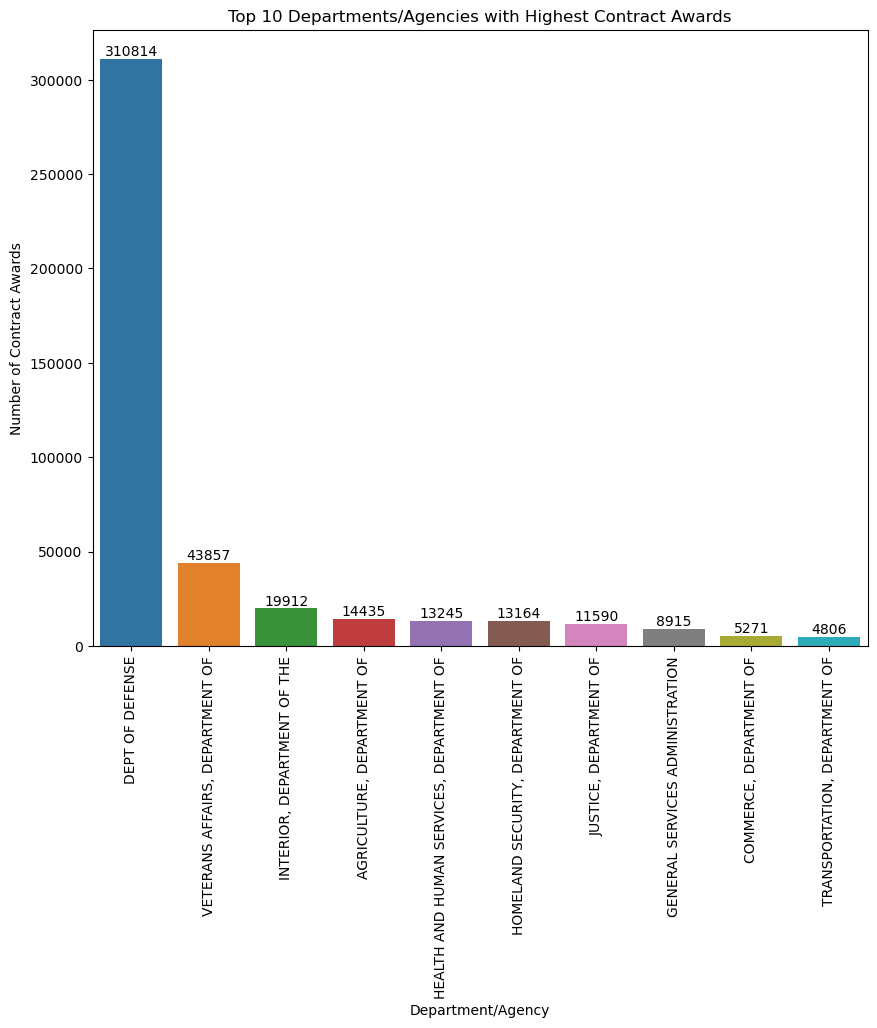

In [146]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_10_departments.index, y=top_10_departments.values, orient='v')
plt.xlabel('Department/Agency')
plt.ylabel('Number of Contract Awards')
plt.title('Top 10 Departments/Agencies with Highest Contract Awards')

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Display the values on the bar graph
for i, v in enumerate(top_10_departments.values):
    ax.text(i, v + 100, str(v), ha='center', va='bottom')

plt.show()

## Conclusions from the above plot:
The most awarded department is the department of defense with 310814 and the lowest with a mere 4806 is the transportation department
Hence, the hypothesis is proven true. 

#### Hypothesis 2
The aim of this hypothesis is to determine whether the state of washington holds the lions share of the contract awards.

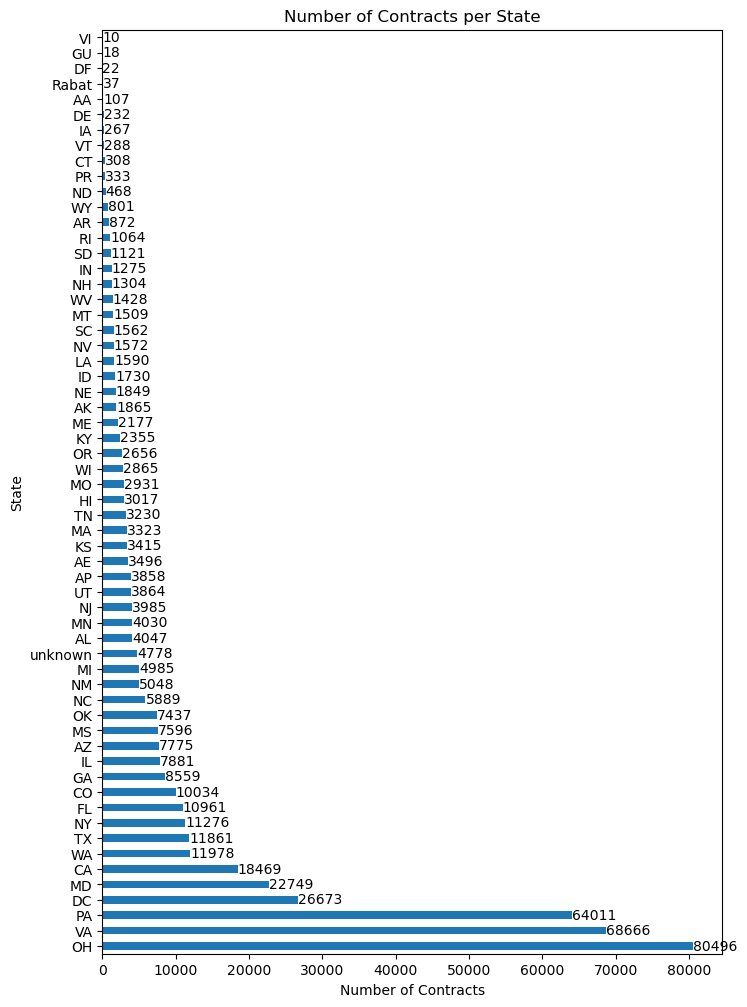

In [149]:
# Calculate the number of contracts per state
contracts_per_state = df_combined['State'].value_counts()

# Plot the vertical bar graph
plt.figure(figsize=(8, 12))
contracts_per_state.plot(kind='barh')
plt.title('Number of Contracts per State')
plt.xlabel('Number of Contracts')
plt.ylabel('State')

# Add contract count values to the bars
for i, count in enumerate(contracts_per_state):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()


In [150]:
data = df_combined.groupby('State').size().reset_index(name='Count')
fig = px.choropleth(data,
                    locations='State', 
                    locationmode='USA-states', 
                    color='Count',
                    color_continuous_scale='purpor', 
                    scope='usa')

fig.show()

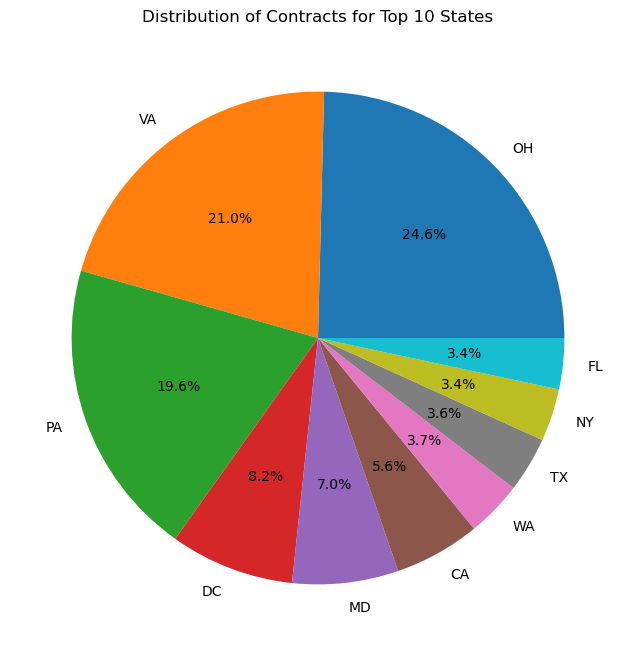

State with the highest number of contracts: OH


In [151]:
# Calculate the top 10 states with the highest number of contracts
top_10_states = contracts_per_state.nlargest(10)

# Plot the pie chart for top 10 states
plt.figure(figsize=(8, 8))
plt.pie(top_10_states.values, labels=top_10_states.index, autopct='%1.1f%%')
plt.title('Distribution of Contracts for Top 10 States')
plt.show()


# Find the state with the highest number of contracts
state_with_highest_contracts = contracts_per_state.idxmax()

# Print the state with the highest number of contracts
print("State with the highest number of contracts:", state_with_highest_contracts)

## Conclusions from the above plot:
After observing the heatmap, it can be inferred Ohio has the majority of awards. Hence, the hypothesis proposed is proven to be incorrect.

## Hypothesis 3
To determine the average contract amount (in USD) for every state.

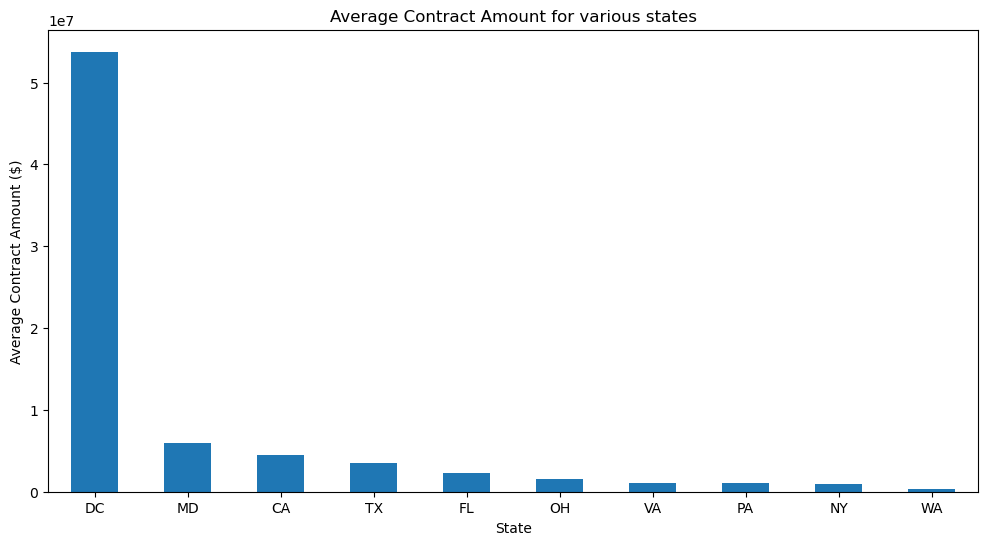

In [154]:
# Convert "Award$" column to numeric data type
df_combined['Award$'] = pd.to_numeric(df_combined['Award$'], errors='coerce')

# Filter the data for the top 10 states with the highest number of contracts
top_10_states = df_combined['State'].value_counts().nlargest(10).index
df_combined_top_10_states = df_combined[df_combined['State'].isin(top_10_states)]

# Calculate the average contract amount for each state
average_award_amount = df_combined_top_10_states.groupby('State')['Award$'].mean().sort_values(ascending=False)


# Plot the bar chart
plt.figure(figsize=(12, 6))
average_award_amount.plot(kind='bar')
plt.title('Average Contract Amount for various states')
plt.xlabel('State')
plt.ylabel('Average Contract Amount ($)')
plt.xticks(rotation=0)
plt.show()


C:\Users\Rashmini\AppData\Local\Temp\ipykernel_6552\4114163655.py:9: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



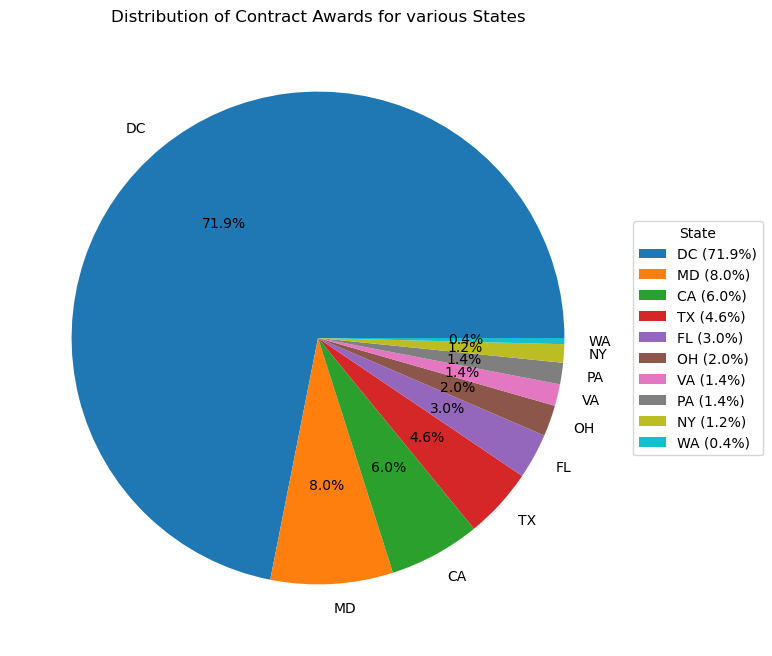

The state with the highest average award amount is DC with $53763971.46


In [155]:
# Plot the pie chart with percentage labels
plt.figure(figsize=(8, 8))
plt.pie(average_award_amount, labels=average_award_amount.index, autopct='%1.1f%%')
plt.title('Distribution of Contract Awards for various States')

# Add percentage labels to the pie chart
total = sum(average_award_amount)
percentages = [f'{(amount/total)*100:.1f}%' for amount in average_award_amount]
plt.gca().legend(average_award_amount.index, title='State', loc='center left', bbox_to_anchor=(1, 0.5), labels=[f'{state} ({percentage})' for state, percentage in zip(average_award_amount.index, percentages)])

plt.show()


# Get the state with the highest average award amount
highest_avg_state = average_award_amount.idxmax()
highest_avg_amount = average_award_amount.max()

# Print the state with the highest average award amount
print(f"The state with the highest average award amount is {highest_avg_state} with ${highest_avg_amount:.2f}")

### Conclusions from the plot:
The inference from the plot is that the state with 71 percent of contract awards is D.C. and the lowest is WA with 0.4 percent.

In [116]:
end_time = time.time()

# Calculate the execution time in seconds
execution_time = end_time - start_time

# Print the execution time
print("Execution time: {:.2f} seconds".format(execution_time))

Execution time: 140.45 seconds
